In [1]:
# Main functions
from src.Constants import *
from src.Utils import *

# Model simulation
from src.EquityModel import *
from src.RatesModel import *
from src.Vasicek import *
from src.CIR import *
from src.HullWhite import *
from src.BlackScholes import *

# Pricing
from src.Pricer import *
from src.EuropeanPricer import *
from src.AsianPricer import *

# Interest rates modeling

### Use a linear function for $\theta(t)$

In [2]:
# Define function for theta(t)
def theta_func(t):
    return 0.1 + 0.2*t

In [3]:
# Default Vasicek model
model = HullWhite(r0=0.01875, a=0.20, theta_func=theta_func, sigma=0.012)

In [4]:
# Displaying information on Vasicek model
model

Hull-White model (r0 = 0.01875,a = 0.2, theta(t) = <function theta_func at 0x000001D7961625F0>, sigma = 0.012))

In [5]:
# Casting the results into a pandas DataFrame
df = Utils.cast_df(model.simulate_euler(T=3, N = 1000))

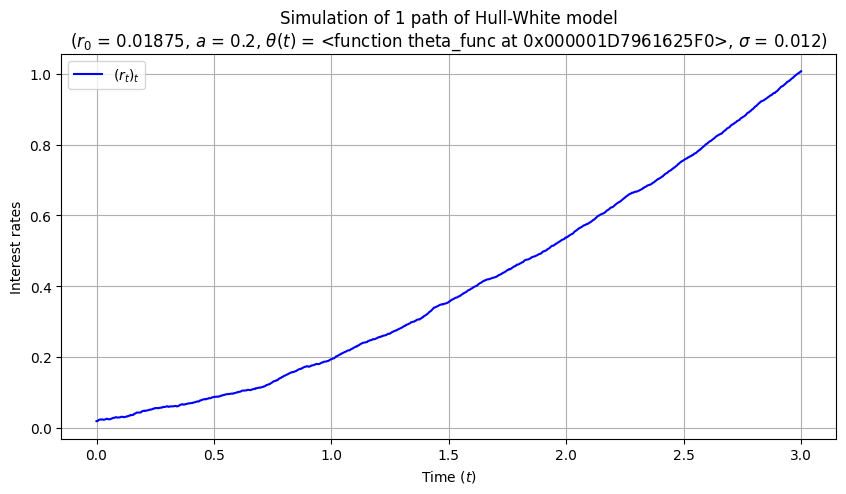

In [6]:
# Simulation of a trajectory
_ = df.plot(color="blue", x="t", y ="r", label="$(r_t)_t$")
_ = plt.grid()
_ = plt.xlabel("Time ($t$)")
_ = plt.ylabel("Interest rates")
_ = plt.title(f"Simulation of 1 path of Hull-White model\n{model.get_parameter_string()}")
_ = plt.legend()

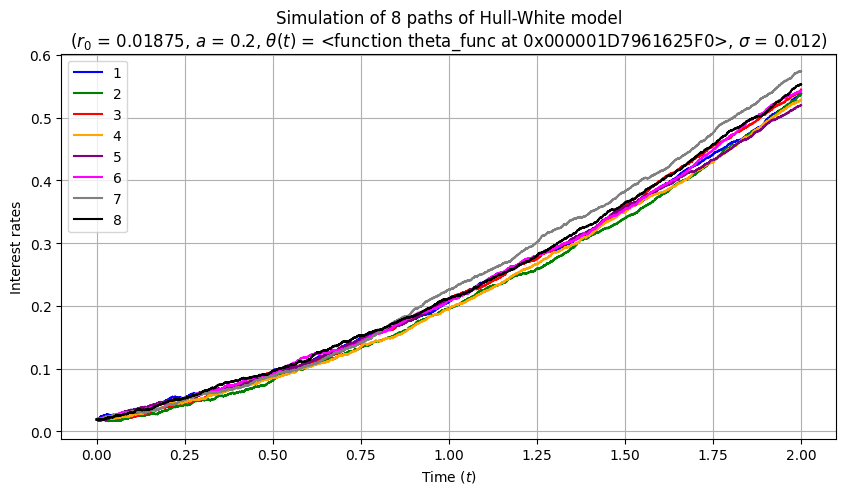

In [7]:
# Simulation of several trajectories
NB_TRAJECTORIES = 8
_ = Utils.cast_df(model.simulate_paths(NB_TRAJECTORIES, T = 2)).T.plot(x = 0, y = list(range(1, NB_TRAJECTORIES + 1)))
_ = plt.grid()
_ = plt.xlabel("Time ($t$)")
_ = plt.ylabel("Interest rates")
_ = plt.title(f"Simulation of {NB_TRAJECTORIES} paths of Hull-White model\n{model.get_parameter_string()}")
_ = plt.legend()

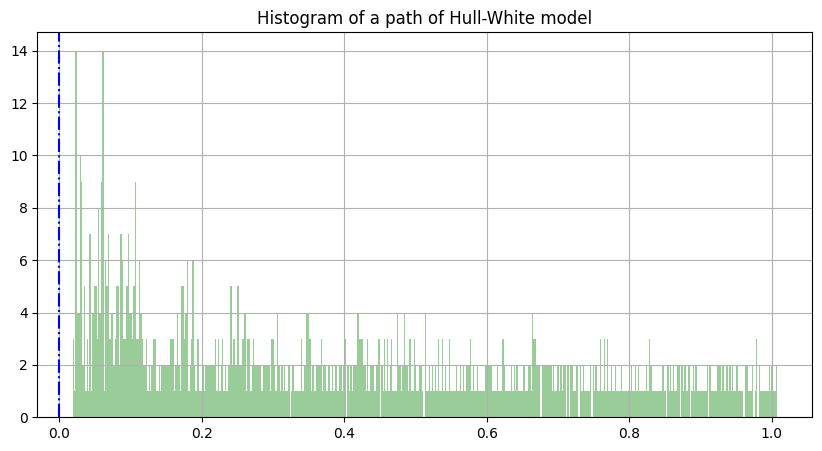

In [8]:
# Histogram of a path
_ = df["r"].hist(bins=int(5e2), color="green", alpha=0.4)
_ = plt.title("Histogram of a path of Hull-White model")
_ = plt.axvline(x = 0, ls = "-.", color="blue")

In [9]:
# Normality test (Shapiro-Wilk + Jarque-Bera)
TEST_THRESHOLD_ALPHA = 5e-2 # Threshold for p-value

# Definition of normality tests (Shapiro-Wilf + Jarque-Bera)
normtest_shapiro = lambda x: scipy.stats.shapiro(x).pvalue > TEST_THRESHOLD_ALPHA 
normtest_jarquebera = lambda x:scipy.stats.jarque_bera(x).pvalue > TEST_THRESHOLD_ALPHA

# Analysis

In [10]:
S0 = 1
sigma = 0.7
rho = 0.5
r =  HullWhite(r0= 0.01875, a=0.20, theta_func=theta_func, sigma=0.014)
model = BlackScholes(S0, r, sigma, rho)

In [11]:
d = model.simulate_euler(T=4.2, getRates=True)
d

{'t': array([0.00000e+00, 2.10000e-04, 4.20000e-04, ..., 4.19937e+00,
        4.19958e+00, 4.19979e+00]),
 'S': array([ 1.        ,  1.00270115,  1.00578992, ..., 22.37783745,
        22.39991605, 22.37713324]),
 'r': array([0.01875   , 0.01886376, 0.01879822, ..., 1.65110827, 1.65099156,
        1.6511009 ])}

In [12]:
df = pd.DataFrame(d)
df.head()

,t,S,r
0,0.00000,1.000000,0.018750
1,0.00021,1.002701,0.018864
2,0.00042,1.005790,0.018798
3,0.00063,1.002305,0.018831
4,0.00084,0.999400,0.018878


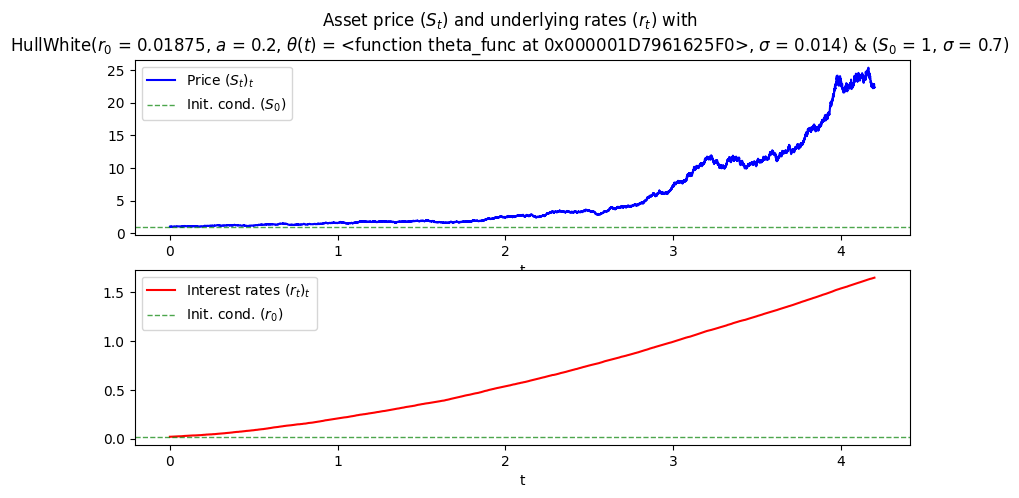

In [13]:
# Plotting the asset price and the interest rates evolution over time 
_, axes = plt.subplots(nrows=2, ncols=1)
_ = df.plot(x = "t", y = "S", color="blue", label="Price $(S_t)_t$", ax=axes[0])
_ = axes[0].axhline(y = model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")
_ = df.plot(x = "t", y = "r", color="red", label="Interest rates $(r_t)_t$", ax=axes[1])
_ = axes[1].axhline(y = r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
axes[0].legend()
axes[1].legend()
_ = plt.suptitle(f"Asset price $(S_t)$ and underlying rates $(r_t)$ with\n{r.MODEL_NAME}{r.get_parameter_string()} & {model.get_parameter_string()}")

## Fixing $\theta(t) = 0.1 + 0.2 t$

### Effect of $a$ :

In [14]:
a= [0.01,0.5,1.0,1.5]
S0 = 1
sigma = 0.7
rho = 0.5

In [15]:
list_data_frame=[]

for a_ in a :
    r = HullWhite(r0= 0.01875, a=a_, theta_func=theta_func, sigma=0.014)
    model = BlackScholes(S0, r, sigma, rho)
    d = model.simulate_euler(T=20, getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)

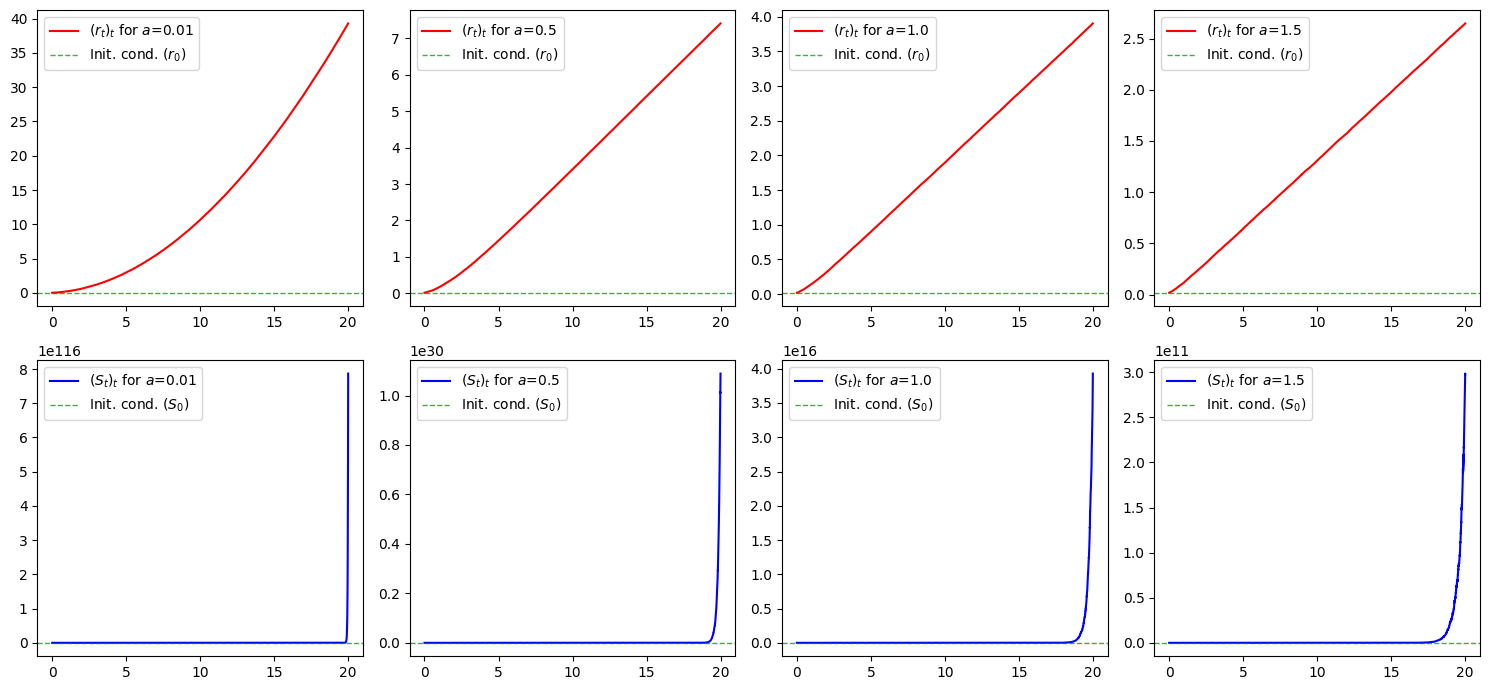

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))

for i, data_frame in enumerate(list_data_frame):
    axes[0][i].plot(data_frame["t"], data_frame["r"], color="red", label="$(r_t)_t$ for $a$="+str(a[i]))
    axes[0][i].axhline(y=r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
    axes[0][i].legend()
    
    axes[1][i].plot(data_frame["t"], data_frame["S"], color="blue", label="$(S_t)_t$ for $a$="+str(a[i]))
    axes[1][i].axhline(y=model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")
    axes[1][i].legend()
    
fig.tight_layout()

When $a$ increases, the interest rates $r(t)$ become more linear.

## Effect of $\sigma$

In [17]:
S0 = 1
sigma = [0.02,0.1,0.5,0.8]
rho = 0.5

In [18]:
list_data_frame=[]

for sig in sigma :
    r = HullWhite(r0= 0.01875, a=0.5, theta_func=theta_func, sigma=sig)
    model = BlackScholes(S0, r, sig, rho)
    d = model.simulate_euler(T=20, getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)

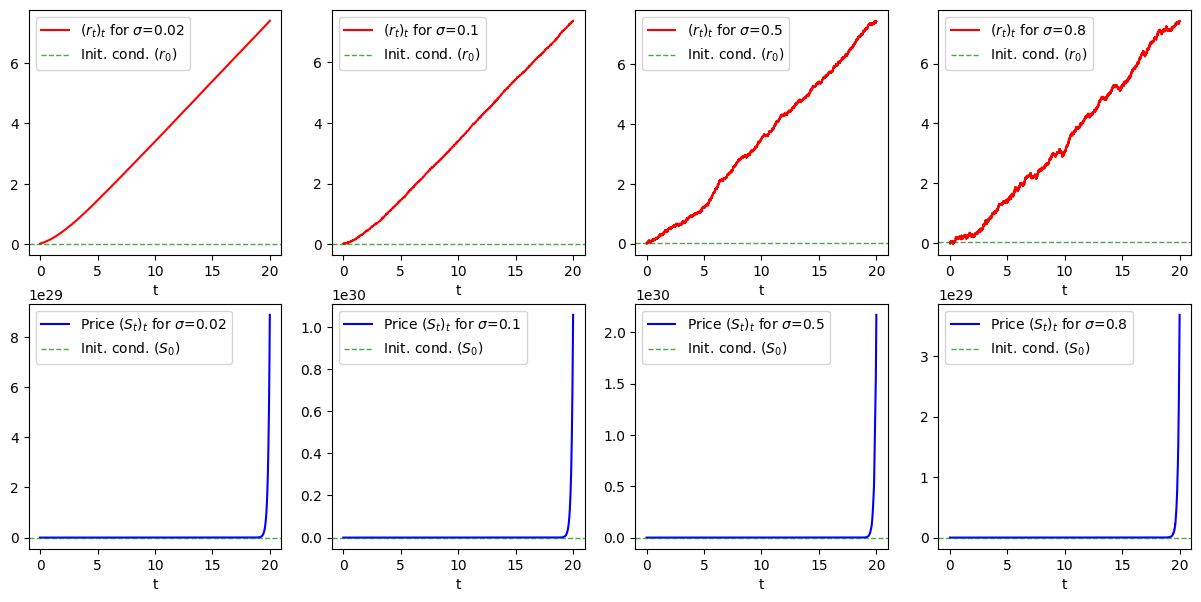

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))

for i, (df, s) in enumerate(zip(list_data_frame, sigma)):
    df.plot(x="t", y="r", color="red", label="$(r_t)_t$ for $\sigma$={}".format(s), ax=axes[0][i])
    axes[0][i].axhline(y=r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
    axes[0][i].legend()

    df.plot(x="t", y="S", color="blue", label="Price $(S_t)_t$ for $\sigma$={}".format(s), ax=axes[1][i])
    axes[1][i].axhline(y=model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")
    axes[1][i].legend()

plt.show()

Using the different values we chose for $\sigma$, we observe that it doesn't affect much the price $S_t$ but when $\sigma$ increases, the interest rate $r_t$ becomes less linear.

## Effect of $\theta(t)$

In [20]:
from typing import List, Tuple, Callable

In [21]:
# Define the theta functions
theta_funcs = [
    lambda t: 0.1,
    lambda t: 0.2*np.exp(-0.05*t),
    lambda t: 0.1 + 0.02*np.log(t+1),
    lambda t: 0.3*np.sin(2*np.pi*t/365) + 0.1
]

In [22]:
list_data_frame=[]

for theta_f in theta_funcs:
    r = HullWhite(r0= 0.01875, a=0.5, theta_func=theta_f, sigma=0.5)
    model = BlackScholes(S0, r, sig, rho)
    d = model.simulate_euler(T=20, getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)

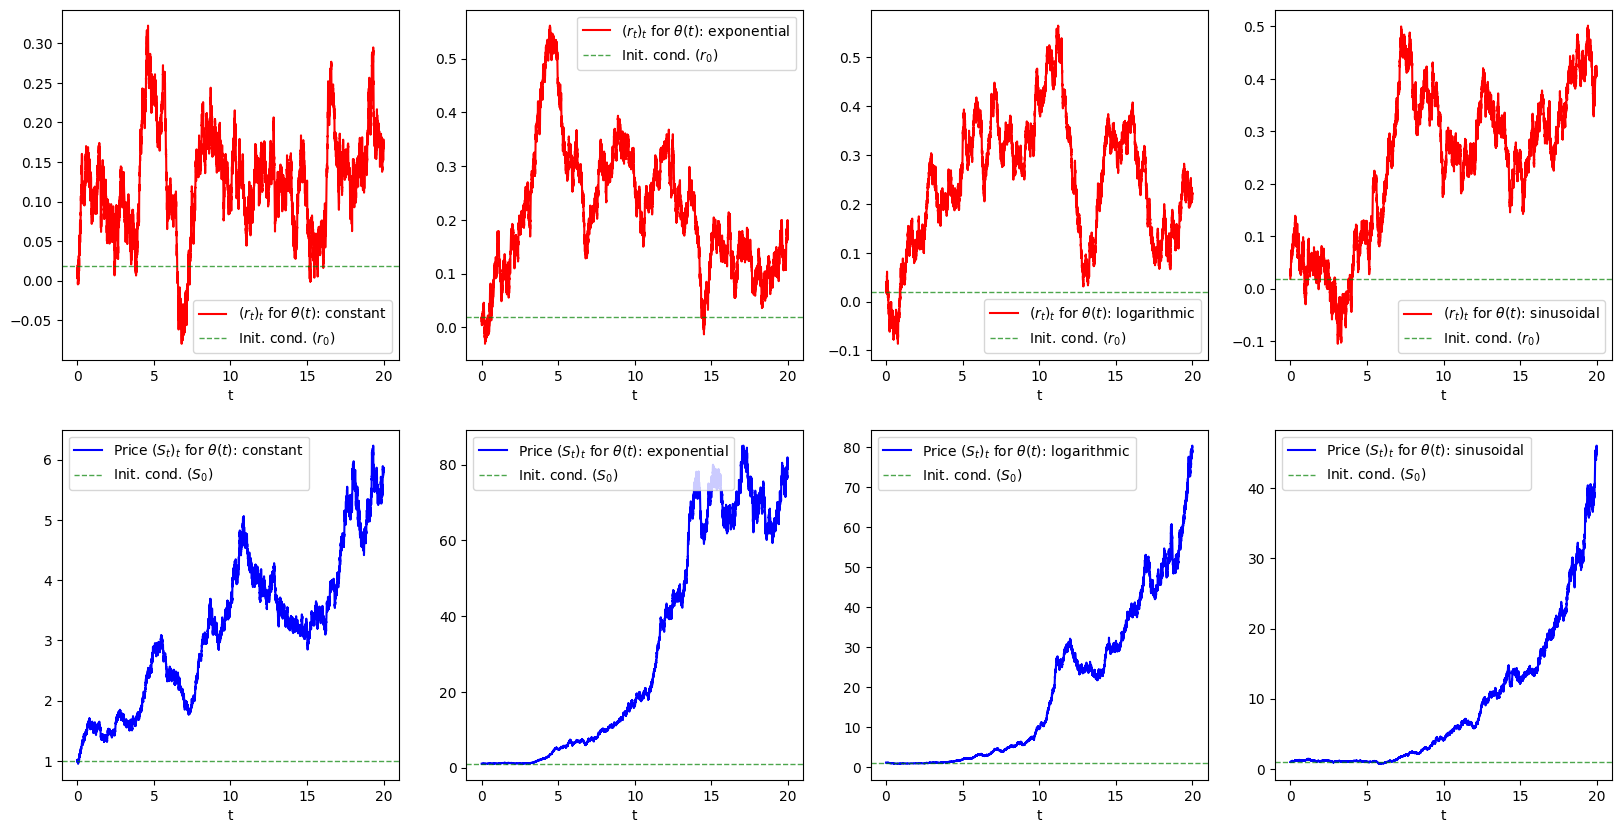

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
function_names=['constant','exponential','logarithmic','sinusoidal']

for i, (df, theta_f) in enumerate(zip(list_data_frame, function_names)):
    df.plot(x="t", y="r", color="red", label="$(r_t)_t$ for $\\theta(t)$: {}".format(theta_f), ax=axes[0][i])
    axes[0][i].axhline(y=r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
    axes[0][i].legend()

    df.plot(x="t", y="S", color="blue", label="Price $(S_t)_t$ for $\\theta(t)$: {}".format(theta_f), ax=axes[1][i])
    axes[1][i].axhline(y=model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")
    axes[1][i].legend()

plt.show()